# Eigenfaces Facial Recognition
This notebook implements facial recognition using the Eigenfaces approach with Principal Component Analysis (PCA).

## 1. Installation & Imports
Install necessary libraries and import required modules.

In [18]:
!pip install numpy opencv-python scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import time
import tracemalloc

## 1. Converting images 


In [20]:
from PIL import Image
import os

def convert_gif_to_png(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for file in os.listdir(input_folder):
        if file.endswith(".gif"):
            img = Image.open(os.path.join(input_folder, file)).convert("L")  # Convert to grayscale
            img.save(os.path.join(output_folder, file.replace(".gif", ".png")))
            print(f"Converted {file} to PNG")

# Example usage
convert_gif_to_png("Yale DataSet", "processed_faces")


Converted subject01.glasses.gif to PNG
Converted subject01.happy.gif to PNG
Converted subject01.leftlight.gif to PNG
Converted subject01.noglasses.gif to PNG
Converted subject01.normal.gif to PNG
Converted subject01.rightlight.gif to PNG
Converted subject01.sad.gif to PNG
Converted subject01.sleepy.gif to PNG
Converted subject01.surprised.gif to PNG
Converted subject04.rightlight.gif to PNG
Converted subject04.sa.gif to PNG
Converted subject04.sleepy.gif to PNG
Converted subject04.surprised.gif to PNG
Converted subject04.wink.gif to PNG
Converted subject05.centerlight.gif to PNG
Converted subject05.glasses.gif to PNG
Converted subject05.happy.gif to PNG
Converted subject05.leftlight.gif to PNG
Converted subject05.noglasses.gif to PNG
Converted subject05.norma.gif to PNG
Converted subject05.rightlight.gif to PNG
Converted subject05.sad.gif to PNG
Converted subject05.sleepy.gif to PNG
Converted subject05.surprise.gif to PNG
Converted subject05.wink.gif to PNG
Converted subject06.centerli

## 2. Load Images
Load grayscale images from a directory, resize them, and convert them into a format suitable for PCA.

In [21]:
def load_images(directory, size=(100, 100)):
    tracemalloc.start()
    start_time = time.time()
    
    images, labels = [], []
    for filename in os.listdir(directory):
        if filename.lower().endswith((".jpg", ".png")):
            path = os.path.join(directory, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            
            if img is None:
                print(f"Warning: Could not load {path}. Skipping.")
                continue
            
            img = cv2.resize(img, size)
            images.append(img.flatten())
            labels.append(filename.split('_')[0])
    
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    print(f"Image loading took: {end_time - start_time:.4f} seconds")
    print(f"Memory used: {current / 1024:.2f} KB (Peak: {peak / 1024:.2f} KB)")
    
    return np.array(images), labels

## 3. Eigenfaces Recognition Algorithm
Implement PCA for face recognition.

In [22]:
def eigenfaces_recognition(training_dir, test_image_path):
    images, labels = load_images(training_dir)
    
    if len(images) == 0:
        raise ValueError(f"No images found in directory: {training_dir}")
    
    mean_face = np.mean(images, axis=0)
    centered_images = images - mean_face
    
    U, S, Vt = np.linalg.svd(centered_images, full_matrices=False)
    k = min(10, images.shape[0])
    top_eigenfaces = Vt[:k].T
    weights = np.dot(centered_images, top_eigenfaces)
    
    test_img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    test_img = cv2.resize(test_img, (100, 100)).flatten()
    test_centered = test_img - mean_face
    test_weights = np.dot(test_centered, top_eigenfaces)
    
    distances = np.linalg.norm(weights - test_weights, axis=1)
    best_match_idx = np.argmin(distances)
    
    return labels[best_match_idx], distances[best_match_idx], top_eigenfaces, S, distances, weights, test_weights

## 4. Save Eigenfaces
Save the top Eigenfaces as images for visualization.

In [23]:
def save_eigenfaces(eigenfaces, size=(100, 100), output_dir="eigenfaces"):
    os.makedirs(output_dir, exist_ok=True)
    for i, eigenface in enumerate(eigenfaces.T):
        ef = eigenface.reshape(size)
        ef = cv2.normalize(ef, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        cv2.imwrite(f"{output_dir}/eigenface_{i}.jpg", ef)

## 5. Run Facial Recognition
Specify the paths and run the Eigenfaces recognition.

Image loading took: 1.0058 seconds
Memory used: 1183.89 KB (Peak: 1251.09 KB)
Test Image: subject01.glasses.png -> Recognized: subject01.glasses.png with distance: 1.1923576132291504e-12
Image loading took: 0.1375 seconds
Memory used: 1183.14 KB (Peak: 1250.34 KB)
Test Image: subject01.happy.png -> Recognized: subject01.happy.png with distance: 1.1138989715542165e-12
Image loading took: 0.1062 seconds
Memory used: 1183.14 KB (Peak: 1250.34 KB)
Test Image: subject01.leftlight.png -> Recognized: subject01.leftlight.png with distance: 2.3881002036432625e-12
Image loading took: 0.0997 seconds
Memory used: 1183.14 KB (Peak: 1250.34 KB)
Test Image: subject01.noglasses.png -> Recognized: subject01.noglasses.png with distance: 1.3572854219061694e-12
Image loading took: 0.1086 seconds
Memory used: 1183.14 KB (Peak: 1250.34 KB)
Test Image: subject01.normal.png -> Recognized: subject01.normal.png with distance: 1.4559018921847493e-12
Image loading took: 0.1066 seconds
Memory used: 1183.14 KB (Pea

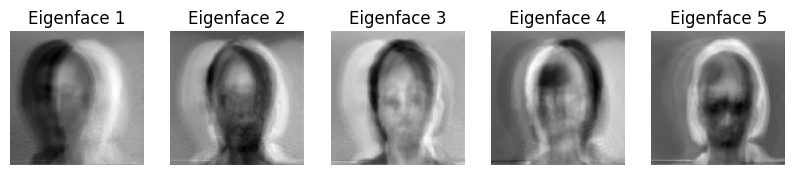

In [16]:
import os
import matplotlib.pyplot as plt

training_directory = "processed_faces"
test_directory = "processed_faces"  # Directory containing test images
correct_predictions = 0
total_tests = 0

try:
    for test_image in os.listdir(test_directory):
        test_image_path = os.path.join(test_directory, test_image)
        actual_person = test_image.split("_")[0]  # Assuming filename format "subject0_xxx.png"

        recognized_person, distance, eigenfaces, singular_values, distances, weights, test_weights = eigenfaces_recognition(training_directory, test_image_path)
        print(f"Test Image: {test_image} -> Recognized: {recognized_person} with distance: {distance}")

        if recognized_person == actual_person:
            correct_predictions += 1
        
        total_tests += 1
    
    # Calculate accuracy
    accuracy = (correct_predictions / total_tests) * 100 if total_tests > 0 else 0
    print(f"Accuracy: {accuracy:.2f}%")
    
    # Save and display eigenfaces
    save_eigenfaces(eigenfaces)
    
    plt.figure(figsize=(10, 5))
    for i in range(min(5, eigenfaces.shape[1])):
        plt.subplot(1, 5, i+1)
        plt.imshow(eigenfaces[:, i].reshape(100, 100), cmap='gray')
        plt.title(f"Eigenface {i+1}")
        plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Error: {e}")

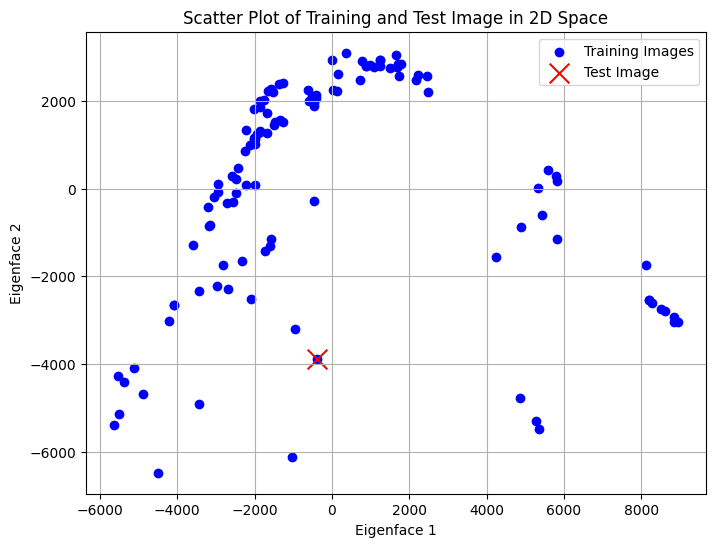

In [17]:
# Scatter plot of training and test images in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(weights[:, 0], weights[:, 1], c='blue', label='Training Images')
plt.scatter(test_weights[0], test_weights[1], c='red', marker='x', s=200, label='Test Image')
plt.xlabel("Eigenface 1")
plt.ylabel("Eigenface 2")
plt.title("Scatter Plot of Training and Test Image in 2D Space")
plt.legend()
plt.grid()
plt.show()
